### Identitas Mahasiswa
Nama  : Rian Setiyana <br>
NIM   : 1306620015 <br>
Prodi : Fisika A 2020 <br>
Tugas 6 - Pengolahan Citra Digital

In [71]:
# Mengimport library yang dibutuhkan
import cv2 as cv
import numpy as np
import numpy.fft as fp
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import scipy.fftpack as fftpack 
import scipy

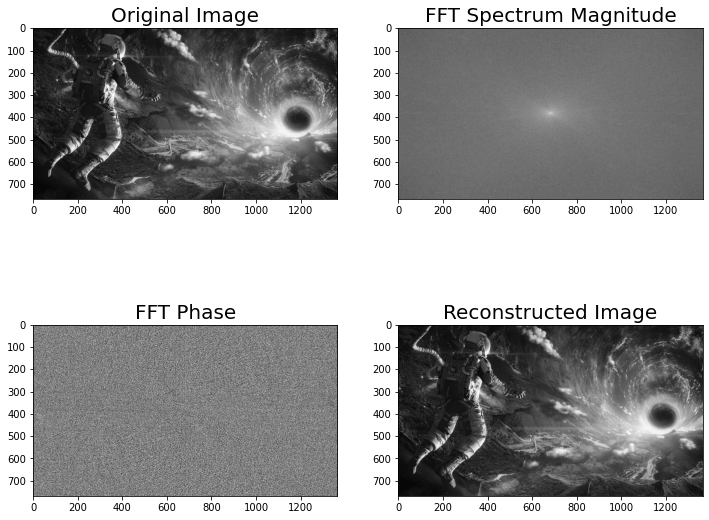

In [72]:
# Melakukan FFT
im1 = cv.imread('Astronot.jpg',0)
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real

# Plot original image
pylab.subplot(2,2,1) 
pylab.imshow(im1, cmap='gray')
pylab.title('Original Image', size=20)

# Plot FFT spectrum magnitude
pylab.subplot(2,2,2)
pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)

# Plot FFT phase
pylab.subplot(2,2,3)
pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')
pylab.title('FFT Phase', size=20)

# Plot reconstructed image
pylab.subplot(2,2,4)
pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

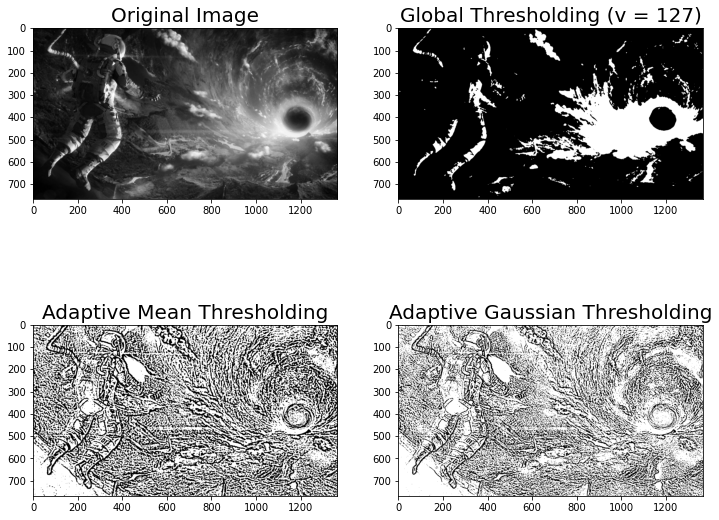

In [73]:
# Adaptive Thresholding
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

pylab.figure(figsize=(12,10))
# Plot original image
pylab.subplot(2,2,1) 
pylab.imshow(img, cmap='gray')
pylab.title('Original Image', size=20)

# Plot global thresholding (v = 127)
pylab.subplot(2,2,2)
pylab.imshow(th1, cmap='gray')
pylab.title('Global Thresholding (v = 127)', size=20)

# Plot adaptive mean thresholding
pylab.subplot(2,2,3)
pylab.imshow(th2, cmap='gray')
pylab.title('Adaptive Mean Thresholding', size=20)

# Plot adaptive gaussian thresholding
pylab.subplot(2,2,4)
pylab.imshow(th3, cmap='gray')
pylab.title('Adaptive Gaussian Thresholding', size=20)
pylab.show()

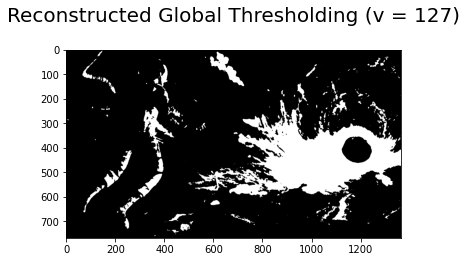

In [74]:
# Plot reconstructed global thresholding (v = 127)
freq1 = fp.fft2(th1)
th1_ = fp.ifft2(freq1).real
pylab.imshow(np.clip(th1_,0,255), cmap='gray')
pylab.title('Reconstructed Global Thresholding (v = 127)\n', size=20)
pylab.show()

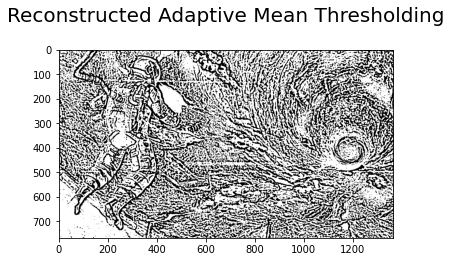

In [75]:
# Plot reconstructed adaptive mean thresholding
freq2 = fp.fft2(th2)
th2_ = fp.ifft2(freq2).real
pylab.imshow(np.clip(th2_,0,255), cmap='gray')
pylab.title('Reconstructed Adaptive Mean Thresholding\n', size=20)
pylab.show()

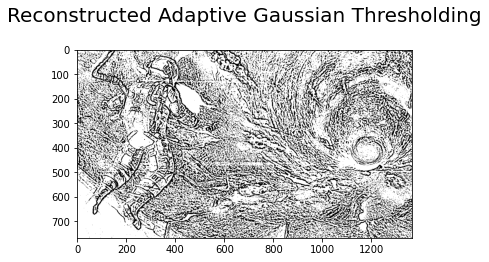

In [76]:
# Plot reconstructed adaptive gaussian thresholding
freq3 = fp.fft2(th3)
th3_ = fp.ifft2(freq3).real
pylab.imshow(np.clip(th3_,0,255), cmap='gray')
pylab.title('Reconstructed Adaptive Gaussian Thresholding\n', size=20)
pylab.show()

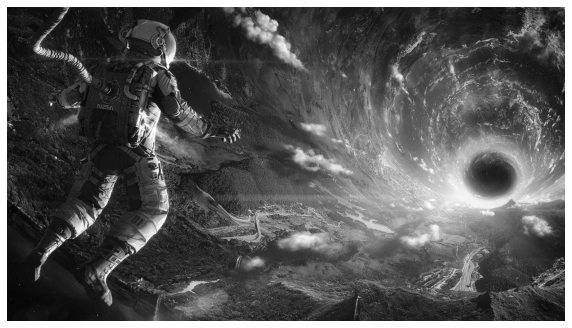

In [77]:
# High-Pass Filter (HPF)
img = cv.imread('Astronot.jpg', 0)
pylab.figure(figsize=(10,10))
pylab.imshow(im, cmap=pylab.cm.gray)
pylab.axis('off')
pylab.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


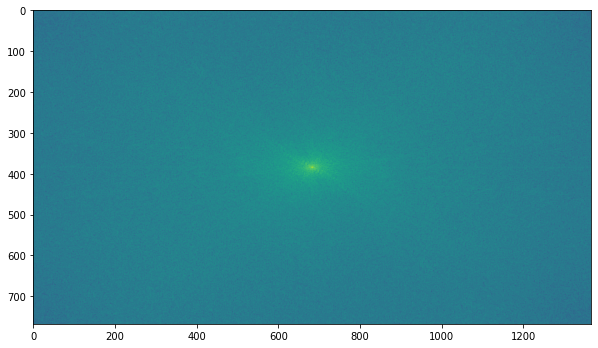

In [78]:
freq = fp.fft2(img)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


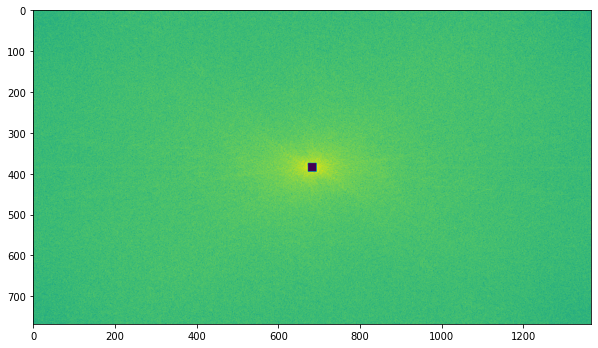

In [79]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

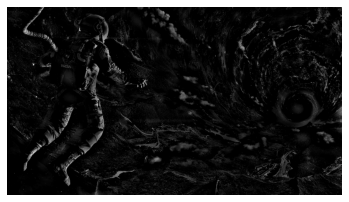

In [80]:
im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.show()


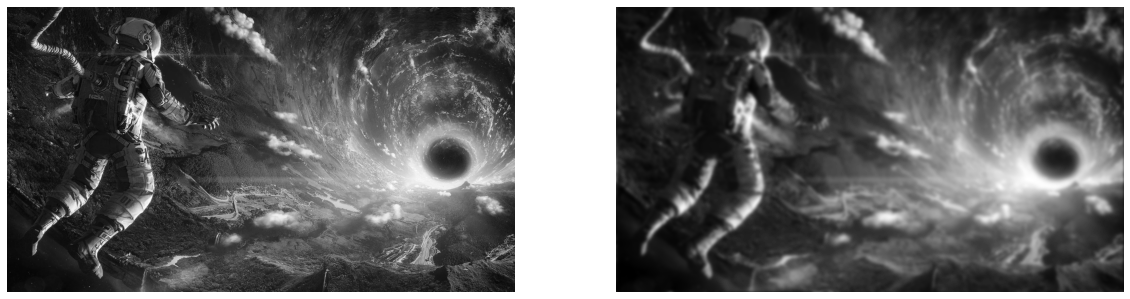

In [85]:
# Low-Pass Filter (LPF)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale
im = cv.imread('Astronot.jpg', 0)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im)
axes1.axis('off')
axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


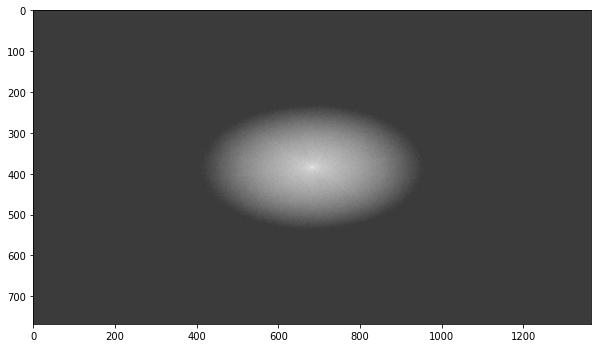

In [87]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + np.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()